In [0]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/train.csv', encoding='cp949')

In [0]:
test_data =  pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/public_test.csv', encoding='cp949')

In [0]:
train_data

,id,year_month,text,smishing
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0
...,...,...,...,...
295940,336373,2018-12,XXX 고객님!열심히 달려왔던 2018년도 어느 새 뒤안길로 지나쳐가고 벅찬 설렘으...,0
295941,336375,2018-12,XXX고객님실버웰빙신탁이 만기도래 예정입니다.XXX남양주지점,0
295942,336376,2018-12,한해동안 XXX은행과 함께 해주셔서 정말 감사드립니다 2019년 기해년을 맞이하며 ...,0
295943,336377,2018-12,1228(금)예금및 적금 만기입니다.예금은 시간내서 내점하시고 적금은 1년 자동연장...,0


# Under Sampling

In [0]:
train_0=train_data[train_data['smishing']==0]
train_1=train_data[train_data['smishing']==1]

train_0=train_0.sample(n=18703)

In [0]:
# 데이터 합치기
train_mini=pd.concat([train_0,train_1])

# shuffling
train_mini=train_mini.sample(frac=1).reset_index(drop=True)

In [0]:
train_mini.head(10)

,id,year_month,text,smishing
0,306184,2018-09,(광고)한국 XXX bank나의 한도금리를 알아보자금전을 요구하는건 보이XXX입니다...,1
1,109533,2017-06,여유로운 마음으로 행복한 저녁시간 보내세요 XXX은행도마동XXX차장올림,0
2,94459,2017-05,행운이 깃드는 기분 좋은 한 주 되세요 XXX병XXX XXX올림,0
3,192708,2017-10,(광고)한국 citi XXX나의 한도금리를 알아보자1)XXX 대부업체 사용으로 높은...,1
4,293959,2018-08,(광고)XXX 추가여신 안내더 큰 혜택 XXX XXX입니다.자격기준과 심사기준이 완...,1
5,33080,2017-03,즐거운 시간으로 가득찬 일주일 보내세요(-) XXX흑석동 XXX 올림,0
6,193470,2017-10,맑은가을햇살과행복을가득담은예쁜가을을선물합니다오늘도행복하세요XXX청계XXX,0
7,238132,2018-03,(광고)XXX고객지원팀 입니다.항상 이용해주셔서 감사합니다.2018년 상반기 정부지...,1
8,96817,2017-05,웃다보면즐거워지고 즐거우면일도잘풀린대요많이웃는한주되세요XXX가능동XXX,0
9,59986,2017-04,고객님의 귀중한 자산 맡겨주셔서감사합니다. 행복한연휴되세요! XXX동수원XXX,0


# word 추출

In [0]:
for i in [0,1]:
  f = open('/content/drive/My Drive/Colab Notebooks/data/데이콘/smishing_Ver2_%d.txt'%i,'w')
  for line in train_mini[train_mini['smishing']==i]['text']:
    f.write('%s\n'%(line))
  f.close()

## class 0

In [0]:
f = open('/content/drive/My Drive/Colab Notebooks/data/데이콘/smishing_Ver2_0.txt','r')
lines_0 = f.readlines()
lines_0 = [l.rstrip() for l in lines_0]
f.close()

In [0]:
text_0=' '.join(lines_0)
word_list_0 = text_0.split(' ')
sorted_word_list_0= sorted(word_list_0)
sorted_word_list_0[-1]
len(sorted_word_list_0)

436138

In [0]:
# 200개이상 단어 출력

num=1
kk_0={}
for idx,w in enumerate(sorted_word_list_0):
    if idx == len(sorted_word_list_0)-1:
        break
    if w == sorted_word_list_0[idx+1]:
        num +=1
    else:
        if num >= 200:
            kk_0[w]=num
        num=0

In [0]:
kk_0

{'': 19905,
 '(광고)': 212,
 '(광고)XXX': 357,
 '-': 862,
 '7월': 224,
 ':': 2139,
 'XXX': 11984,
 'XXX계장': 229,
 'XXX대리': 205,
 'XXX올림': 1159,
 'XXX은행': 3318,
 'XXX은행을': 532,
 'XXX지점': 437,
 'XXX지점을': 342,
 'XXX팀장': 282,
 '가능': 211,
 '가능한': 222,
 '가능합니다.': 294,
 '가득': 424,
 '가득하시길': 304,
 '가득한': 900,
 '가장': 206,
 '가정에': 294,
 '감사': 450,
 '감사드리며': 764,
 '감사드립니다.': 590,
 '감사의': 232,
 '감사합니다': 298,
 '감사합니다.': 669,
 '같은': 224,
 '거래': 675,
 '거래해': 754,
 '거래해주셔서': 588,
 '건강': 452,
 '건강과': 232,
 '경우': 1179,
 '고객님': 2289,
 '고객님!': 479,
 '고객님XXX은행': 330,
 '고객님께': 679,
 '고객님께서': 571,
 '고객님을': 377,
 '고객님의': 1527,
 '고객만족도': 536,
 '관련': 537,
 '관심을': 200,
 '궁금하신': 401,
 '그': 343,
 '기분': 307,
 '기분좋은': 293,
 '기원합니다.': 273,
 '꼭': 975,
 '꾸준한': 243,
 '꾸준히': 217,
 '날씨에': 294,
 '내': 404,
 '내점': 298,
 '넘치는': 203,
 '늘': 522,
 '다시': 235,
 '다양한': 564,
 '다운로드': 305,
 '다하겠습니다.': 204,
 '대단히': 217,
 '대출': 208,
 '대한': 560,
 '대해': 396,
 '더': 1110,
 '더욱': 545,
 '되세요': 272,
 '되시기': 201,
 '되시길': 713,
 '드리는': 272,
 '드림': 34

## Class 1

In [0]:
f = open('/content/drive/My Drive/Colab Notebooks/data/데이콘/smishing_Ver2_1.txt','r')
lines_1 = f.readlines()
lines_1 = [l.rstrip() for l in lines_1]
f.close()

text_1=' '.join(lines_1)
word_list_1 = text_1.split(' ')

sorted_word_list_1= sorted(word_list_1)
len(sorted_word_list_1)

2668135

In [0]:
# 1000개이상 나오는 단어 출력

num=1
kk_1={}
for idx,w in enumerate(sorted_word_list_1):
    if idx == len(sorted_word_list_1)-1:
        break
    if w == sorted_word_list_1[idx+1]:
        num +=1
    else:
        if num >= 1000:
            kk_1[w]=num
        num=0

In [0]:
kk_1

{'': 137408,
 '%': 1235,
 '(': 1225,
 '(광고)': 2708,
 '(광고)XXX': 3044,
 ')': 1258,
 '-': 7127,
 '.': 1196,
 '00분': 2524,
 '00시': 2338,
 '1.': 2429,
 '10%대의': 1374,
 '13건으로': 3330,
 '1금융권': 2123,
 '1년이상(1년미만도': 1733,
 '1등급까지': 1961,
 '1번': 3068,
 '1억': 1606,
 '2.': 2210,
 '2.97%자격:': 2582,
 '20%이상의': 1558,
 '2018년': 1294,
 '3%(등급': 1473,
 '3.': 2391,
 '3.97%자격:': 1290,
 '300%까지': 1010,
 '300%이내가능최근': 1041,
 '3000만원까지연': 1353,
 '3개월': 1010,
 '4.': 1747,
 '4000만': 1775,
 '4000만원': 1031,
 '45%85%': 2457,
 '5.': 1242,
 '50%이상': 1256,
 '5년분할상환': 1203,
 '6.': 1448,
 '6개': 2792,
 '6개월': 1549,
 '6개월간': 2818,
 '6개월이상': 1076,
 '7등급이내의': 4029,
 '8.68%12%자격:': 2208,
 '85%감소시켜드립니다.2.신용도를': 1565,
 '85%까지': 1656,
 '85%정도': 1053,
 ':': 3162,
 'I': 1078,
 'KISA': 1024,
 'XXX': 20836,
 'XXX-XXX-XXX': 2671,
 'XXX-XXX-XXX제목없음': 1104,
 'XXX에서': 1324,
 'XXX은행': 3775,
 'and': 1732,
 'bank': 1123,
 '가능': 6594,
 '가능하실수': 2523,
 '가능할': 1753,
 '가상': 1190,
 '가상조회를': 1580,
 '간단하게': 2626,
 '감사합니다': 1111,
 '감사합니다.2018

In [0]:
print(len(kk_0))
print(len(kk_1))

216
557


In [0]:
train_set=set()

for name in kk_0:
  train_set.add(name)

for name in kk_1:
  train_set.add(name)

print(len(train_set))
train_set=list(train_set)

719


# word 통일

In [0]:
train_mini.shape

(37406, 4)

In [0]:
train_vect = np.zeros((37406,len(train_set)))

In [0]:
for i in range(0,len(train_mini['text'])):
  for name in train_set:
    if name in train_mini['text'][i]:
      train_vect[i][train_set.index(name)]=1

# Data Split

In [0]:
train_label=np.array(train_mini['smishing'])
train_label

array([1, 0, 0, ..., 0, 0, 0])

In [0]:
train_vect

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(train_vect,train_label, test_size=0.4, random_state=123)
#X_val, X_test,y_val,y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=123)

In [0]:
print(X_val.shape)
print(y_val.shape)

(7481, 719)
(7481,)


# Modeling and Test

## sklearn 로지스틱 회귀

In [0]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# #LogisticRegression을 이용해 학습/예측/평가 수행.
# lr_clf = LogisticRegression()
# lr_clf.fit(X_train,y_train)
# pred = lr_clf.predict(X_test)
# print('CountVectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,
#                                                                                    pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CountVectorized Logistic Regression의 예측 정확도는 0.999


### sklearn Submit

In [0]:
#submit=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/public_test.csv', encoding='cp949')

In [0]:
#submit_vect=np.zeros((1626,len(train_set)))

In [0]:
# for i in range(0,len(submit['text'])):
#   for name in train_set:
#     if name in submit['text'][i]:
#       submit_vect[i][train_set.index(name)]=1

In [0]:
#submit_pred = lr_clf.predict(submit_vect)

In [0]:
#submit_pred

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
#submit['smishing']=submit_pred

In [0]:
#submit['smishing'].value_counts()

0    1492
1     134
Name: smishing, dtype: int64

In [0]:
#submit.drop(['year_month','text'], axis='columns', inplace=True)

In [0]:
#submit.to_csv("/content/drive/My Drive/Colab Notebooks/data/데이콘/gyu_submit2.csv", mode='w')

## keras 로지스틱 회귀

In [0]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

Train on 22443 samples, validate on 7481 samples
Epoch 1/100
22443/22443 [==============================] - 2s 92us/step - loss: 0.0302 - acc: 0.9894 - val_loss: 0.0051 - val_acc: 0.9987
Epoch 2/100
22443/22443 [==============================] - 2s 67us/step - loss: 0.0028 - acc: 0.9993 - val_loss: 0.0065 - val_acc: 0.9989
Epoch 3/100
22443/22443 [==============================] - 2s 70us/step - loss: 0.0012 - acc: 0.9997 - val_loss: 0.0074 - val_acc: 0.9993
Epoch 4/100
22443/22443 [==============================] - 2s 73us/step - loss: 4.7907e-04 - acc: 0.9998 - val_loss: 0.0044 - val_acc: 0.9992
Epoch 5/100
22443/22443 [==============================] - 2s 76us/step - loss: 2.4331e-04 - acc: 0.9999 - val_loss: 0.0060 - val_acc: 0.9993
Epoch 6/100
22443/22443 [==============================] - 2s 75us/step - loss: 1.6280e-04 - acc: 0.9999 - val_loss: 0.0064 - val_acc: 0.9993
Epoch 7/100
22443/22443 [==============================] - 2s 69us/step - loss: 1.2860e-04 - acc: 0.9999 - val_

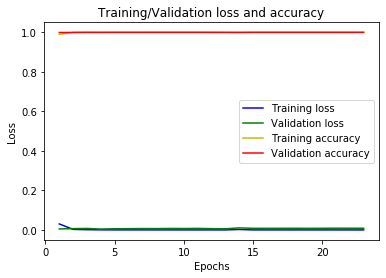

In [0]:
#3. 모델 구성하기
model = Sequential()
model.add(Dense(32, input_dim=719, activation ='relu'))
model.add(Dense(16, activation ='relu'))
model.add(Dense(8, activation ='relu'))
model.add(Dense(4, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

#4. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])



#5. 모델 학습시키기
#5.1. Early Stopping
callbacks_list = [
    EarlyStopping(
    monitor='val_acc',
    patience=20,
    ),
     ModelCheckpoint(
     filepath='multi_model.h5',
     monitor='val_loss',
     save_best_only=True,
     )
]

hist = model.fit(X_train, y_train, epochs = 100,callbacks=callbacks_list,validation_data=(X_val, y_val))

#6. 모델 평가하기
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

#epoch, loss, acc 그래프
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['acc']
val_acc = hist.history['val_acc']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')

plt.title('Training/Validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Submit

In [0]:
submit=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/public_test.csv', encoding='cp949')

In [0]:
submit_vect=np.zeros((1626,len(train_set)))

In [0]:
for i in range(0,len(submit['text'])):
  for name in train_set:
    if name in submit['text'][i]:
      submit_vect[i][train_set.index(name)]=1

In [0]:
Y_predict = model.predict(submit_vect)

In [0]:
submit['smishing']=Y_predict

In [0]:
submit.loc[submit['smishing']>=0.5,'smishing']=1
submit.loc[submit['smishing']<0.5,'smishing']=0

In [0]:
submit['smishing'].value_counts()

0.0    1475
1.0     151
Name: smishing, dtype: int64

In [0]:
submit.drop(['year_month','text'], axis='columns', inplace=True)

In [0]:
submit.to_csv("/content/drive/My Drive/Colab Notebooks/data/데이콘/gyu_submit_keras.csv", mode='w')